In [127]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use([
    'grid',
    'notebook'
])

In [128]:
Ts = 1

sim_time = 2500
iterations = int(sim_time / Ts)

time = np.arange(0, sim_time, Ts)

r = .31
mu = .40
sigma = .55
A2 = np.pi * r**2

In [129]:
def M1(Z1):
    return 0.0242768777763438*Z1 - 0.0932567910017114


def M2(Z1):
    return 1 - M1(Z1)

pertinence_functions = np.array([
    [M1, M2],
])

In [130]:
k1 = 29.4
b1 = 83.93

k2 = 165.48
b2 = 147.01

k3 = 16.46
b3 = 156.93

[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-126.74431329]]
[[   0.21666677]
 [-

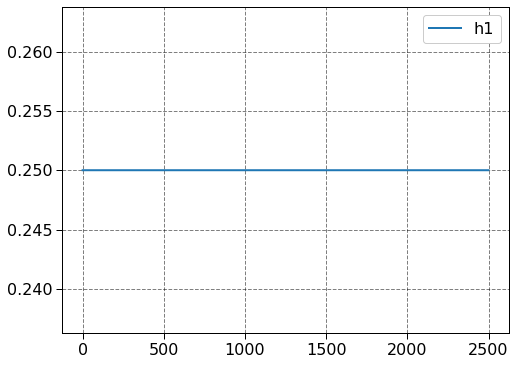

In [131]:
h1_t = np.zeros(iterations)
h2_t = np.zeros(iterations)

h1_0 = .25
h2_0 = .18

h1_t[0] = h1_0
h2_t[0] = h2_0

h1 = h1_0
h2 = h2_0

n = 8

A_matrices = [np.load(f'./vertices/A_{i}.npy') for i in range(n)]
B_matrices = [np.load(f'./vertices/B_{i}.npy') for i in range(n)]

u = 0

for i in range(1, iterations):
    diff = h2 - h1

    q34 = (k1*(h2-h1) - b1)
    qout = (k2*np.sqrt(h1) - b2)

    l2 = np.cos(2.5*np.pi * (h1 - mu)) / (sigma * np.sqrt(2 * np.pi))
    l3 = np.exp(-((h1 - mu)**2) / (2 * sigma**2))

    A1 = ((3*r)/5) * (2.7*r - (l2 * l3))

    Z1 = 1/A1

    l2 = np.cos(2.5*np.pi * (h1 - mu)) / (sigma * np.sqrt(2 * np.pi))
    l3 = np.exp(-((h1 - mu)**2) / (2 * sigma**2))

    A1 = ((3*r)/5) * (2.7*r - (l2 * l3))

    h1_t[i] = h1
    h2_t[i] = h2

    h = np.array([
        [h1],
        [h2]
    ])

    v = np.array([
        [pertinence_functions[0, 0](Z1), pertinence_functions[0, 1](Z1)],
    ])

    Ai = v[0, 0] * A_matrices[0] + v[0, 1] * A_matrices[1]
    Bi = v[0, 0] * B_matrices[0] + v[0, 1] * B_matrices[1]

    sys = (Ai@h)

    print(sys)

plt.plot(time, h1_t, label='h1')
plt.legend()